In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
from scipy.stats import pearsonr

In [3]:
%pylab inline
# import matplotlib.pyplot as plt et numpy as np

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = pd.read_csv("C:/Users/Utilisateur/projet 6/notes.csv")
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


# Mission 0

Afin d'introduire votre analyse, effectuez une brève description des données (analyses univariées et bivariées).

In [5]:
#data1 = pd.read_csv(r"C:\Users\Utilisateur\projet 6\notes.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


In [7]:
data.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


## NETTOYAGE DES DONNEES 

In [8]:
# Affichage de valeurs manquantes 
data.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [9]:
# Recherche des doublons
data.drop_duplicates()


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


## ANALYSES UNIVARIEES 

### Mesures de tendance centrale et de dispersion 

In [10]:
field=["diagonal", "height_left", "height_right","margin_low","margin_up", "length"]

In [11]:
is_genuine_true = data[data["is_genuine"]==True]
is_genuine_false = data[data["is_genuine"]==False]

In [12]:
excluded_axis = "is_genuine"

In [13]:
def tendance_centrale(data, excluded_axis):
    for feature in data.columns:
        if feature != excluded_axis:
            print("\n\nNom de la variable:" + feature)

            #calcul de la moyenne
            Moyenne = round(np.mean(data[feature]),2)

            #calcul de la médiane
            Mediane = round(np.median(data[feature]),2)
            # Calcul de l'écart_type dans sa version non biaisée de l'échantillon
            Ecart_type = round(np.std(data[feature], ddof =1),2)

            # # Calcul de la variance empirique (Var) dans sa version biaisé de l'échantillon
            Variance = round(np.var(data[feature], ddof = 1),2)

            # Calcul de la Variance empirique dans sa version biaisée
            Variance_biais = round(np.var(data[feature]),2)

            print("Moyenne :", Moyenne)
            print("Médiane:", Mediane)
            print("Ecart_type:", Ecart_type)
            print("Variance:", Variance)
            print("Variance_biais:", Variance_biais)
        
print("\n\n**********Dataframe billets vrais : is_genuine_true")
tendance_centrale(is_genuine_true, excluded_axis ) 
print("\n\n**********Dataframe billets faux: is_genuine_false")
tendance_centrale(is_genuine_false, excluded_axis)



**********Dataframe billets vrais : is_genuine_true


Nom de la variable:diagonal
Moyenne : 171.98
Médiane: 172.0
Ecart_type: 0.31
Variance: 0.09
Variance_biais: 0.09


Nom de la variable:height_left
Moyenne : 103.95
Médiane: 103.92
Ecart_type: 0.3
Variance: 0.09
Variance_biais: 0.09


Nom de la variable:height_right
Moyenne : 103.78
Médiane: 103.76
Ecart_type: 0.29
Variance: 0.09
Variance_biais: 0.08


Nom de la variable:margin_low
Moyenne : 4.14
Médiane: 4.08
Ecart_type: 0.31
Variance: 0.1
Variance_biais: 0.1


Nom de la variable:margin_up
Moyenne : 3.06
Médiane: 3.07
Ecart_type: 0.2
Variance: 0.04
Variance_biais: 0.04


Nom de la variable:length
Moyenne : 113.21
Médiane: 113.21
Ecart_type: 0.38
Variance: 0.14
Variance_biais: 0.14


**********Dataframe billets faux: is_genuine_false


Nom de la variable:diagonal
Moyenne : 171.89
Médiane: 171.88
Ecart_type: 0.3
Variance: 0.09
Variance_biais: 0.09


Nom de la variable:height_left
Moyenne : 104.23
Médiane: 104.22
Ecart_type: 0.21
Vari

## Représentation des variables sur un histogramme: une variable qualitatif et une variable quantitative 




**********Dataframe billets vrais : is_genuine_true


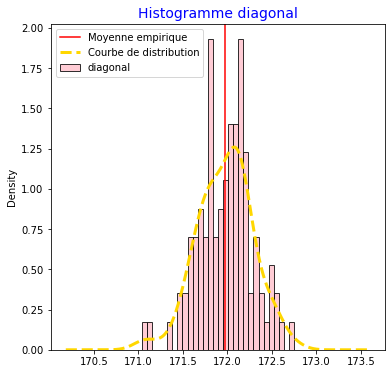

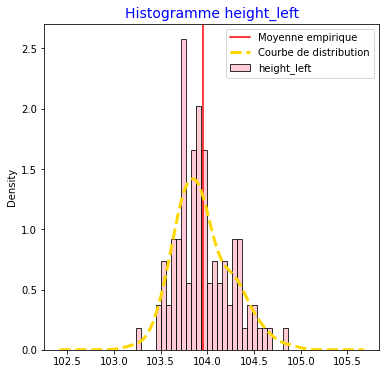

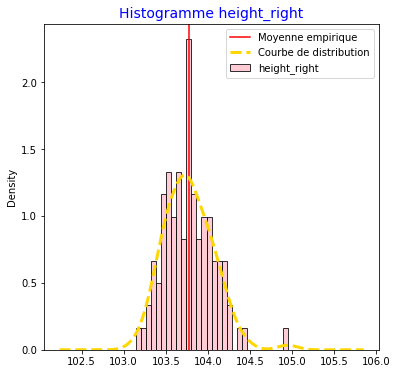

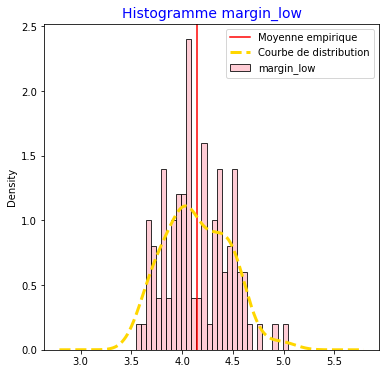

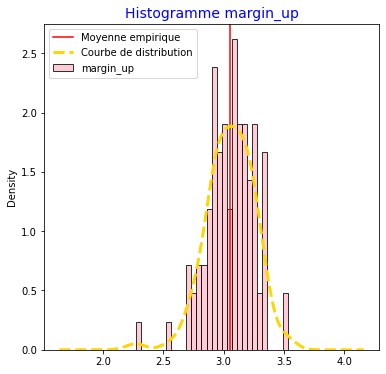

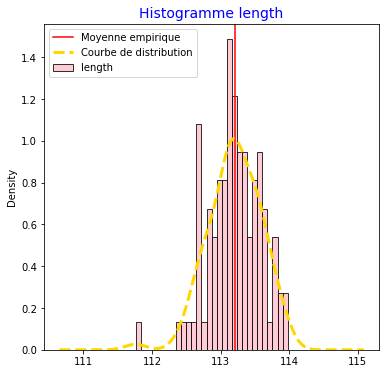



**********Dataframe billets faux: is_genuine_false


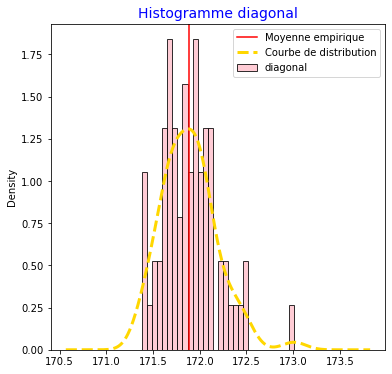

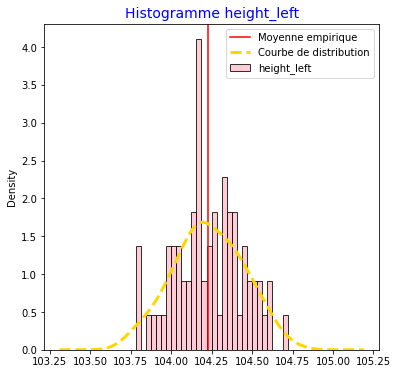

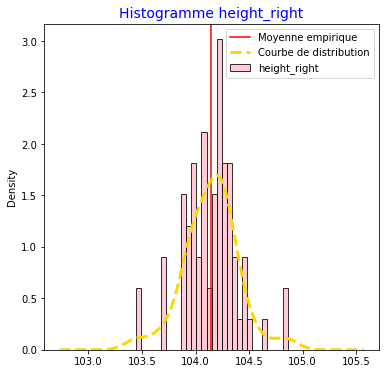

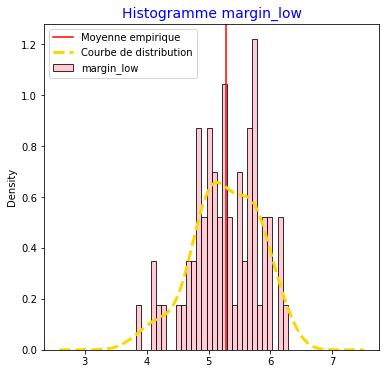

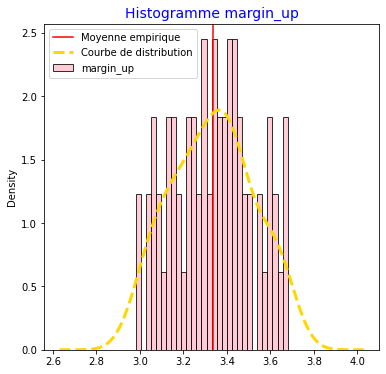

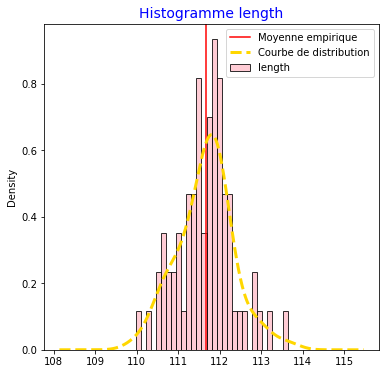

In [14]:
def histo_data(my_data, excluded_axis):
    for feature in my_data.columns:
        if feature != excluded_axis:
            xmin = data[feature].min()
            xmax = data[feature].max()
            #bins_range = np.arange(xmin, xmax, (xmax-xmin)/100)
            plt.figure(figsize(6,6))
            plt.title("Histogramme " + feature, fontsize = 14, color = 'blue')

            my_data[feature].plot(kind = 'hist', bins = 30, density = True, alpha = 0.8, edgecolor = 'black', color = 'pink')

            # Ajout de la moyenne empirique sur l'histogramme
            plt.axvline((np.mean(my_data[feature])), color = 'red', label = 'Moyenne empirique')

            # Ajout de la courbe de distribution
            my_data[feature].plot(kind ='kde', color = 'gold', label = 'Courbe de distribution', linestyle = 'dashed', lw = 3)

            #plt.xlabel(feature, fontsize = 14)
            plt.legend()
    plt.show()

print("\n\n**********Dataframe billets vrais : is_genuine_true")
histo_data(is_genuine_true, excluded_axis)
print("\n\n**********Dataframe billets faux: is_genuine_false")
histo_data(is_genuine_false, excluded_axis)

## Diagramme-boîte 

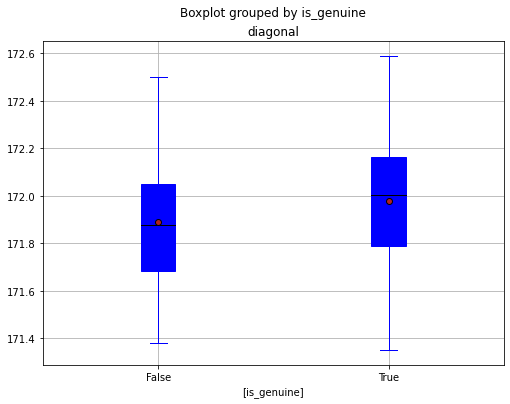

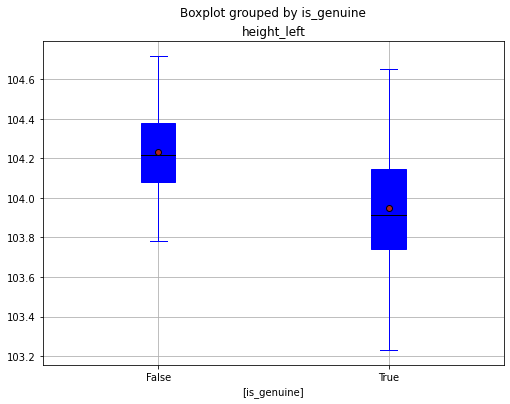

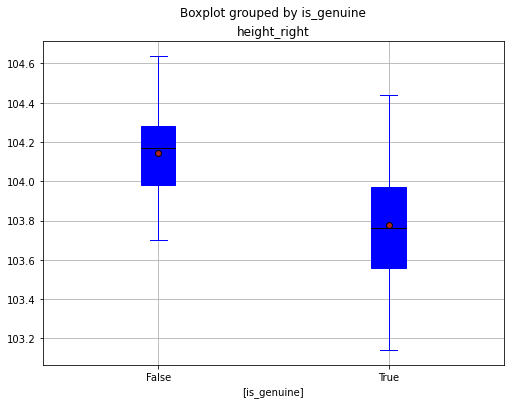

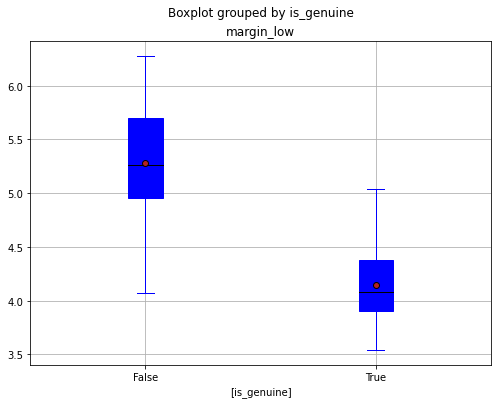

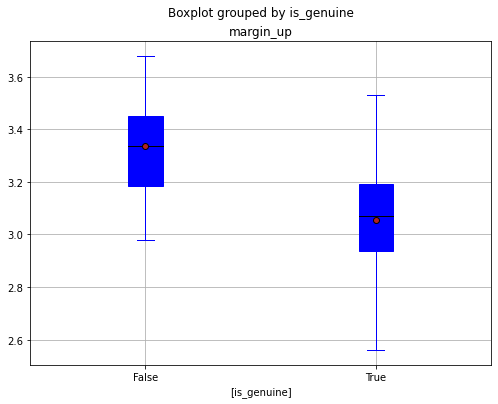

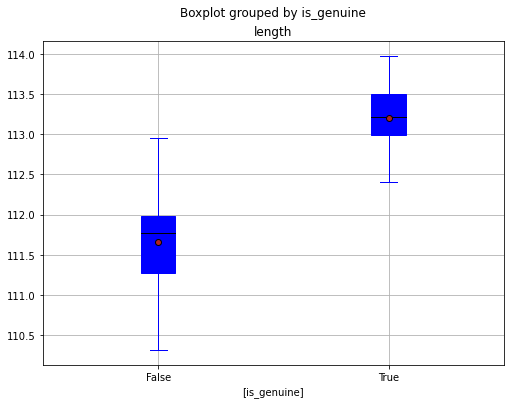

In [15]:
def boxplot(moustache, excluded_axis):
    for features in data.columns:
        if features != excluded_axis:
            medianprops = {"color": "black"}
            meanprops = {"marker": "o", "markeredgecolor": "black", "markerfacecolor": "firebrick"}
            data.boxplot(column = [features], by =["is_genuine"], figsize = (8,6),showfliers = False, medianprops = medianprops, 
                      showmeans = True, meanprops = meanprops, patch_artist = True, color='blue')
            plt.show()
boxplot(data, excluded_axis)

In [16]:
fields_to_check = data.columns
fields_to_check
# il faut supprimer le is_genuine

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

## Calcul des quantiles pour billets vrais 

In [17]:
#def quantiles(data, excluded_axis): 
   # for feature in data.columns:
        #if feature!=excluded_axis:
            #data[feature].quantile(q=[0.25, 0.5, 0.75], axis=0, numeric_only=True, interpolation='linear')
            
#quantiles(is_genuine_true, excluded_axis )

In [18]:
is_genuine_true[field].quantile(q=[0.25, 0.5, 0.75], axis=0, numeric_only=True, interpolation='linear')

,diagonal,height_left,height_right,margin_low,margin_up,length
0.25,171.7900,103.740,103.5575,3.9000,2.9375,112.995
0.50,172.0050,103.915,103.7600,4.0800,3.0700,113.210
0.75,172.1625,104.145,103.9725,4.3825,3.1925,113.505


## Calcul des quantiles pour billets faux  

In [19]:
is_genuine_false[field].quantile(q=[0.25, 0.5, 0.75], axis=0, numeric_only=True, interpolation='linear')

,diagonal,height_left,height_right,margin_low,margin_up,length
0.25,171.6825,104.0825,103.9825,4.9525,3.185,111.270
0.50,171.8750,104.2150,104.1700,5.2650,3.335,111.765
0.75,172.0475,104.3775,104.2800,5.7025,3.450,111.985


## Diagramme en paire 

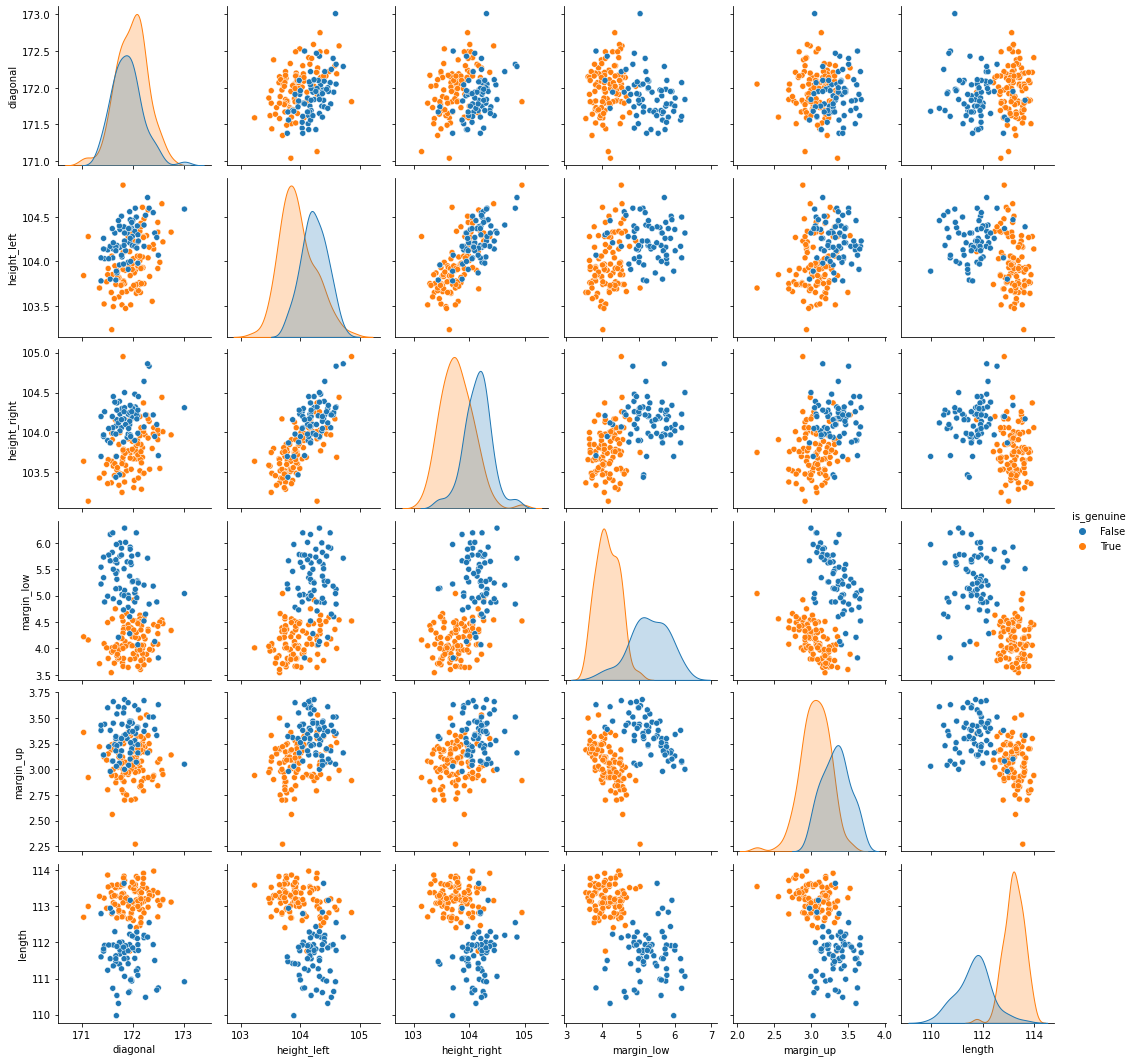

In [20]:
sns.pairplot(data, hue="is_genuine")

## Corrélation entre deux variables quantitatives
La hauteur droite et la hauteur gauche

### Coefficient de Pearson

In [21]:
import scipy.stats as st

In [22]:
print(st.pearsonr(data["height_left"],data["height_right"]))

(0.7343902682297874, 4.419617592421597e-30)


## corrélation entre deux variables une quantitative et l'autre qualitative

La diagonale et nature du billet

In [23]:
X = "is_genuine" # variable qualitative
Y = "diagonal" # variable quantitative

sous_echantillon = data[data["diagonal"] > 0]

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])    

0.019383108567093806

# Mission 1

In [24]:
from functions import *

### ACP

In [25]:
from sklearn import decomposition 
from sklearn import preprocessing
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

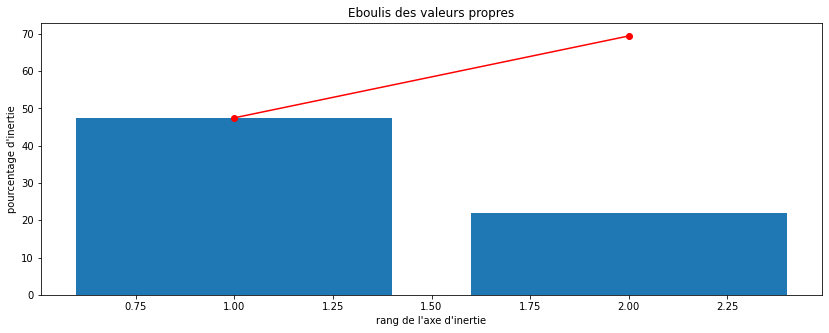


 Résultat du pourcentage de variance expliquée: 

 [0.47447921 0.69405027]



 Résultat du pourcentage de variance cumulée: 

 [0.47447921 0.69405027]



Tableau des clusters : 

 [1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]



Dataframe centroïdes:


    cluster    diagonal  height_left  height_right  margin_low  margin_up  \
0        1  171.894085   104.243662    104.160986    5.248592   3.333521   
1        2  171.973939   103.939192    103.761111    4.155657   3.053434   

       length  
0  111.660423  
1  113.223030  



Cercle de corrélation et projection des individus

  


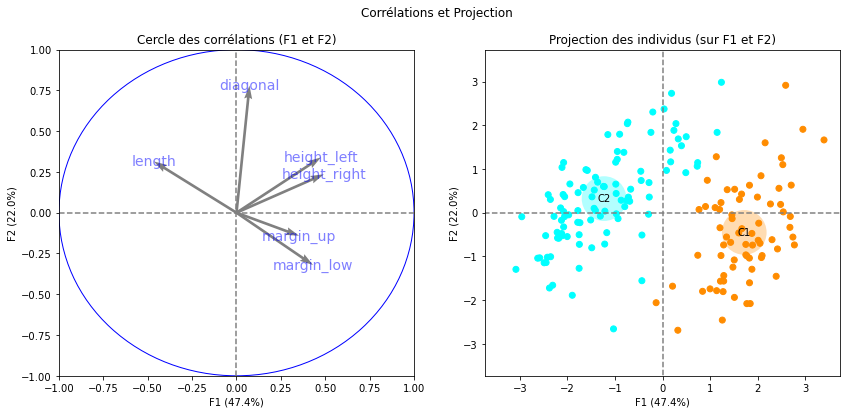

In [26]:
#On va convertir notre tableau pour regarder la forme de X en un tableau numpy

X = data[field].values
# on positionne les labels (noms des colonnes)
names = data.index
features = data.columns


#Calcul des données standardisées : centrage-reduction 
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# On fixe le nombre de composantes principales à 5 
n_comp = 2

#On applique l'objet pca aux données normalisées
pca = decomposition.PCA(n_components = n_comp)
pca.fit(X_scaled)

# Eboulis de valeurs propres 
display_scree_plot(pca)

# Cercle de corrélation¶
pcs = pca.components_

# Nombre de clusters maximal car on a deux types de billets des vrais et des faux 
nombre_clusters = 2 
y_acp = data['is_genuine'].values
# Nous allons définir les clusters
list_cluster = {"1": "C1", "2": "C2"}

# Nous allons attibuer une couleur à chaque clusters
colors = ["darkorange", "cyan"]
cmap = ListedColormap(colors)

# Calcul du pourcentage de variance expliquée
print("\n Résultat du pourcentage de variance expliquée: \n\n", pca.explained_variance_ratio_.cumsum())

# Calcul du pourcentage de variance cumulée
print("\n\n\n Résultat du pourcentage de variance cumulée: \n\n",pca.explained_variance_ratio_.cumsum())

# Générer la matrice des liens
z0 = linkage(X_scaled, method = 'ward', metric = 'euclidean')
cluster_pca = fcluster(z0, 2, criterion = 'maxclust')
data['cluster'] = cluster_pca
print("\n\n\nTableau des clusters : \n\n", cluster_pca) 

#Calcul des centroïdes

donnees_centroids = data.groupby("cluster").mean()
x_centroids = std_scale.transform(donnees_centroids[field].values)

# on crée la varaible x_cluster qui contient les noms des centroïdes 
x_cluster = np.array(list_cluster.values())

# Nous pouvons ainsi afficher le dataframe centroïdes
print("\n\n\nDataframe centroïdes:\n\n\n",donnees_centroids[field].reset_index())

# cercle de corrélation et projection des individus 

print("\n\n\nCercle de corrélation et projection des individus\n\n  ")
display_factorial_plane_circle(pca=pca,n_comp=n_comp,centroids=x_centroids, labels_=cluster_pca ,axis_rank=[(0,1)],labels = np.array(field),X= X_scaled, colors=colors,cmap=cmap, X_clusters=np.array(list(list_cluster.values())).flatten())


### détermination du nombre de cluster maximum

## Analyse avec le K-means

In [27]:
from sklearn.cluster import KMeans
from functions import *

In [28]:
# Nombre de clusters souhaités
n_clust = 2

# import de l'échantillon
data_kmeans =data[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']]

# préparation des données pour le clustering
X = data_kmeans.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

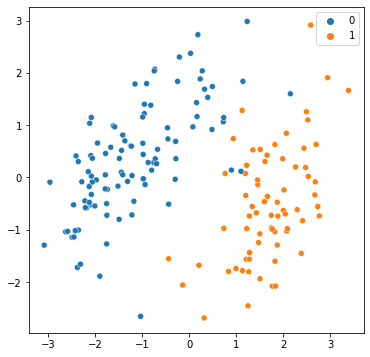

In [29]:
X_projected= pca.transform(X_scaled)
sns.scatterplot(x= X_projected[:,0], y= X_projected[:,1],hue= clusters )
plt.legend()
plt.show()

# Mission 2

## K-NN

In [30]:
X_knn = X_projected
y_knn = data['is_genuine'].values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size = 0.2, random_state = 42)

## Détermination du meilleur k 

In [32]:
from sklearn import neighbors

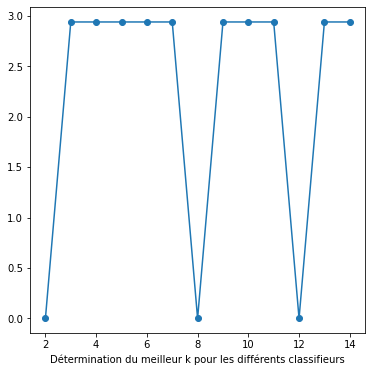

In [33]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
xlabel("Détermination du meilleur k pour les différents classifieurs")
plt.show()

## Entraînement du modèle : Le k-NN

In [70]:
from sklearn import neighbors
# Initialisation du classifieur knn avec 8 voisins
classifier_knn = neighbors.KNeighborsClassifier(n_neighbors = 8)

# Adapter le classifieur aux données d'apprentissage 
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

## Prédiction du model

In [35]:
# On récupère les prédictions sur les données test
y_predict_knn = classifier_knn.predict(X_test)
y_predict_knn

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False])

In [36]:
# Affichage du score de précision des ensembles de test
classifier_knn.score(X_test, y_test)

1.0

### Matrice de confusion

In [37]:
data['prediction_knn'] = classifier_knn.predict(X_knn)
pd.crosstab(data['is_genuine'], data['prediction_knn'])

prediction_knn,False,True
is_genuine,,
False,70,0
True,2,98


## Affichage de la région limite des biais

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
<ipython-input-38-8900f10d13df>:28: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0], X_test[:, 1], c='',


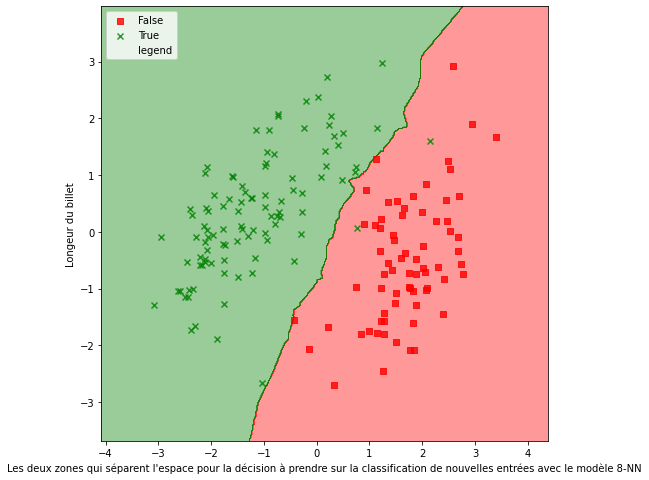

In [38]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(8,8))
def affichage_region_dec(X, y, classifier, test_idx=None, resolution=0.02):
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'green', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # trace la surface de décision
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)

   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='legend')
      
      
X_combine = np.vstack((X_train, X_test))
#Empilez les tableaux en séquence verticalement 
y_combine = np.hstack((y_train, y_test))
#Empilez les tableaux en séquence horizontalement



affichage_region_dec(X_combine,
                      y_combine, classifier=classifier_knn,
                      test_idx=range(105,150))
   
plt.xlabel('Diagonale du billet')
plt.ylabel('Longeur du billet')
plt.legend(loc='upper left')
xlabel("Les deux zones qui séparent l'espace pour la décision à prendre sur la \
classification de nouvelles entrées avec le modèle 8-NN")
plt.show()  


# Nous allons utiliser ce modèle pour prédire les billets du nouveau jeu de données 

## Nouveau jeu de données à prédire

In [39]:
example_knn = pd.read_csv(r"C:\Users\Utilisateur\projet 6\example.csv")
example_knn

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


## Fonction de prédiction

In [40]:
def predict_csv(csv :str, scaler=std_scale, pca=pca, clf=classifier_knn):
  df_test = pd.read_csv(csv)
  X_test = df_test.drop(["id"], axis=1)
  X_test_scaled = scaler.transform(X_test)
  X_test_pca = pca.transform(X_test_scaled)
  df_test["proba"] = clf.predict_proba(X_test_pca)[:,1]
  df_test["prediction"] = clf.predict(X_test_pca)
  return df_test, X_test_pca

In [41]:
_, X_test_pca = predict_csv("C:/Users/Utilisateur/projet 6/example.csv")
_, X_test_pca

(   diagonal  height_left  height_right  margin_low  margin_up  length   id  \
 0    171.76       104.01        103.54        5.21       3.30  111.42  A_1   
 1    171.87       104.17        104.13        6.00       3.31  112.09  A_2   
 2    172.00       104.58        104.29        4.99       3.39  111.57  A_3   
 3    172.49       104.55        104.34        4.44       3.03  113.20  A_4   
 4    171.65       103.63        103.56        3.77       3.16  113.33  A_5   
 
    proba  prediction  
 0    0.0       False  
 1    0.0       False  
 2    0.0       False  
 3    1.0        True  
 4    1.0        True  ,
 array([[ 0.43085827, -1.54707958],
        [ 1.75559905, -0.80117248],
        [ 2.4413791 ,  0.35043141],
        [ 0.88552678,  2.62860988],
        [-2.23394886, -0.85274237]]))

## Affichage de la prédiction dans le modèle original

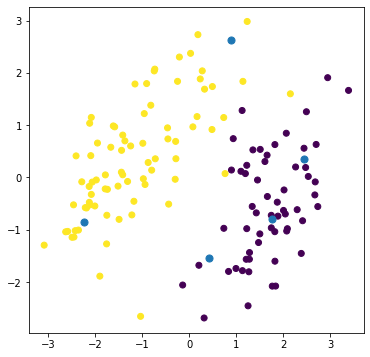

In [42]:
fig, ax = plt.subplots()
ax.scatter(X_train[:,0],X_train[:,1], c=y_train)
ax.scatter(X_test_pca[:,0],X_test_pca[:,1],s=50)


# Régression linéaire multiple¶

In [43]:
import statsmodels.formula.api as smf

In [44]:
reg_multi = smf.ols('cluster ~ diagonal + height_left + height_right + margin_low + margin_up + length',  data = data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                cluster   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     187.3
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           1.97e-70
Time:                        10:56:49   Log-Likelihood:                 54.562
No. Observations:                 170   AIC:                            -95.12
Df Residuals:                     163   BIC:                            -73.17
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -9.3943      8.876     -1.058   

## Retirez les variables non significatives¶

In [45]:
reg_multi = smf.ols('cluster ~ diagonal  + height_right + margin_low + margin_up + length', data = data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                cluster   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     226.0
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           1.27e-71
Time:                        10:56:49   Log-Likelihood:                 54.544
No. Observations:                 170   AIC:                            -97.09
Df Residuals:                     164   BIC:                            -78.27
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -9.1624      8.758     -1.046   

In [46]:
reg_multi = smf.ols('cluster ~  height_right + margin_low + margin_up + length', data = data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                cluster   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     278.3
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           3.23e-72
Time:                        10:56:49   Log-Likelihood:                 52.973
No. Observations:                 170   AIC:                            -95.95
Df Residuals:                     165   BIC:                            -80.27
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.3432      5.820      0.403   

### On peut donc utiliser ce modèle à des fins de prévision!

In [47]:
a_prevoir = pd.DataFrame({'height_right' : 103.53, 'margin_low': 3.77,  'margin_up': 3.16, 'length': 113.33}, index = [0])
cluster_prev = reg_multi.predict(a_prevoir)
print(round(cluster_prev[0], 1))

2.1


In [48]:
def prevision_billet(my_height_right, my_margin_low, my_margin_up, my_length):
    a_prevoir = pd.DataFrame({'height_right' : my_height_right, 'margin_low': my_margin_low,  'margin_up': my_margin_up, 'length': my_length}, index = [0])
    cluster_prev = reg_multi.predict(a_prevoir)
    print("\n\n Réponse inférieure à 2, donc faux billet, réponse supérieure ou égale à 2, donc vrai billet:", round(cluster_prev[0]))
    
    if cluster_prev[0] < 1.5: 
        print("\n\n Le billet est faux")
    else: 
        print("\n\n Le billet est vrai")
    
    return cluster_prev[0]
    

In [49]:
example_regression = pd.read_csv(r"C:\Users\Utilisateur\projet 6\example.csv")
example_regression

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [50]:
 # prevision_billet = ('height_right', 'margin_low','margin_up','length')

In [51]:
prevision_billet(103.54, 5.21, 3.30, 111.42)



 Réponse inférieure à 2, donc faux billet, réponse supérieure ou égale à 2, donc vrai billet: 1


 Le billet est faux


1.1770712388628128

In [52]:
prevision_billet(104.13, 6.00, 3.31, 112.09)



 Réponse inférieure à 2, donc faux billet, réponse supérieure ou égale à 2, donc vrai billet: 1


 Le billet est faux


0.956549855052617

In [53]:
prevision_billet(104.29, 4.99, 3.39, 111.57)



 Réponse inférieure à 2, donc faux billet, réponse supérieure ou égale à 2, donc vrai billet: 1


 Le billet est faux


1.0771509418600766

In [54]:
prevision_billet(104.34, 4.44, 3.03, 113.20 )



 Réponse inférieure à 2, donc faux billet, réponse supérieure ou égale à 2, donc vrai billet: 2


 Le billet est vrai


1.7594020506620174

In [55]:
prevision_billet(103.56,3.77, 3.16, 113.33 )



 Réponse inférieure à 2, donc faux billet, réponse supérieure ou égale à 2, donc vrai billet: 2


 Le billet est vrai


2.059764964352574

# Modèle de Régression logistique 

In [56]:
# Adaptation de la régression logistique à l'ensemble de formation
from sklearn.preprocessing import StandardScaler

In [57]:
X_logistic = X_projected
y_logistic = data['is_genuine'].values

In [58]:
# Fractionner le jeu de données entre les ensembles de formation et de test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size = 0.40, random_state = 42)

## On va entraîner le model

In [59]:
from sklearn.linear_model import LogisticRegression

classifier_logistic = LogisticRegression(random_state = 0)
classifier_logistic.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [60]:
y_prediction_logistic = classifier_logistic.predict(X_test)
y_prediction_logistic

array([False,  True, False,  True,  True, False, False,  True, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
        True,  True, False, False,  True, False,  True, False, False,
        True,  True,  True, False,  True, False, False,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True, False,  True])

## EVALUATION DU MODELE

In [61]:
# Calcul du score du model
classifier_logistic.score(X_test, y_test)

0.9705882352941176

## Matrice de confusion

In [62]:
data['Prediction_logistic'] = classifier_logistic.predict(X_logistic)
pd.crosstab(data['is_genuine'], data['Prediction_logistic'])

Prediction_logistic,False,True
is_genuine,,
False,68,2
True,2,98


## Affichage du model de regression logistique

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
<ipython-input-63-2cf324e32b57>:26: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0], X_test[:, 1], c='',


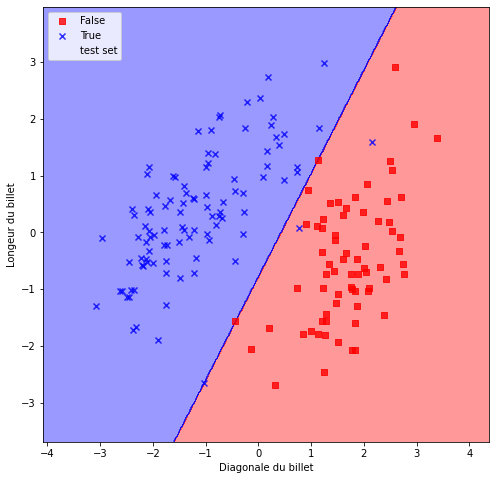

In [63]:
plt.figure(figsize = (8,8))
def affichage_region_dec(X, y, classifier, test_idx=None, resolution=0.02):
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # trace la surface de décision
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)

   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')
   
   
           
X_combine = np.vstack((X_train, X_test))
#Empilez les tableaux en séquence verticalement 
y_combine = np.hstack((y_train, y_test))
#Empilez les tableaux en séquence horizontalement 

affichage_region_dec(X_combine,
                      y_combine, classifier=classifier_logistic,
                      test_idx=range(105,150))
   
plt.xlabel('Diagonale du billet')
plt.ylabel('Longeur du billet')
plt.legend(loc='upper left')
plt.show()     


# On peut donc utiliser ce modèle à des fins de prévision!

In [64]:
example_logistic = pd.read_csv(r"C:\Users\Utilisateur\projet 6\example.csv")
example_logistic

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [65]:
def predict_csv(csv :str, scaler=std_scale, pca=pca, clf=classifier_logistic):
  df_test = pd.read_csv(csv)
  X_test = df_test.drop(["id"], axis=1)
  X_test_scaled = scaler.transform(X_test)
  X_test_pca = pca.transform(X_test_scaled)
  df_test["proba"] = clf.predict_proba(X_test_pca)[:,1]
  df_test["prediction"] = clf.predict(X_test_pca)
  return df_test, X_test_pca

In [66]:
_, X_test_pca = predict_csv("C:/Users/Utilisateur/projet 6/example.csv")
_, X_test_pca

(   diagonal  height_left  height_right  margin_low  margin_up  length   id  \
 0    171.76       104.01        103.54        5.21       3.30  111.42  A_1   
 1    171.87       104.17        104.13        6.00       3.31  112.09  A_2   
 2    172.00       104.58        104.29        4.99       3.39  111.57  A_3   
 3    172.49       104.55        104.34        4.44       3.03  113.20  A_4   
 4    171.65       103.63        103.56        3.77       3.16  113.33  A_5   
 
       proba  prediction  
 0  0.117526       False  
 1  0.014936       False  
 2  0.013193       False  
 3  0.913208        True  
 4  0.994616        True  ,
 array([[ 0.43085827, -1.54707958],
        [ 1.75559905, -0.80117248],
        [ 2.4413791 ,  0.35043141],
        [ 0.88552678,  2.62860988],
        [-2.23394886, -0.85274237]]))

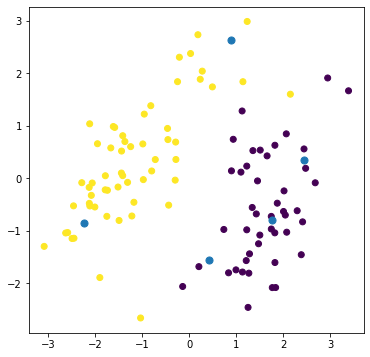

In [67]:
fig, ax = plt.subplots()
ax.scatter(X_train[:,0],X_train[:,1], c=y_train)
ax.scatter(X_test_pca[:,0],X_test_pca[:,1],s=50)


In [68]:
X_projected

array([[ 2.15363875,  1.59970945],
       [-2.11041589, -0.52603892],
       [-1.97315242, -0.04810178],
       [-2.05979509, -0.08910521],
       [-2.40318009,  0.41216977],
       [ 1.23565611,  2.98319112],
       [-2.07941191,  1.14797998],
       [-2.62393408, -1.04013317],
       [-1.73630901, -0.227631  ],
       [ 0.72748966,  1.06388107],
       [ 0.49582635,  1.73847781],
       [-2.09026468,  0.41670968],
       [ 0.16022666,  1.43072514],
       [-1.51099968, -0.16606   ],
       [-1.24242842,  0.60216942],
       [-1.75333312, -0.50267375],
       [-1.21324817,  0.03566659],
       [-1.66473154,  0.57778357],
       [-1.48336646,  0.36363733],
       [-0.75344444,  0.28241819],
       [-1.78026387,  0.04851185],
       [ 0.03144616,  2.37337698],
       [ 0.32912853,  1.68824072],
       [-0.20619611,  2.30300194],
       [-1.22566926,  0.59722119],
       [ 0.23751564,  1.88390247],
       [-0.72903068,  2.07182053],
       [ 0.08123469,  0.96744265],
       [-0.95290722,